# Census Income Project (Evaluation Project - 5)

### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


#### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.


#### To download the dataset, use the link given below : 

https://github.com/SANJAY9068068086/Machine-Learning-DataSets/blob/1202ba46b6aaf1358ae19d4d9736d7716a8d3ac2/census_income.csv

In [1]:
# Import some necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the dataset

census_data = pd.read_csv("census_income.csv")
census_data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# Shape of the dataset

census_data.shape

(32560, 15)

There are 32560 Rows and 15 Columns.

In [4]:
# Let's check the null values

census_data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [5]:
# Quick information about dataset

census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 6 numerical and 9 object column in which our target column is Income. As discussed in the problem statement, We have to predict the Income. Our Target column is in object.


Value Counts : 
  <=50K    24719
 >50K      7841
Name: Income, dtype: int64


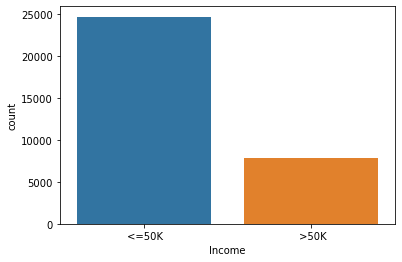

In [6]:
# Let's analyze the target column. Is there any class imbalance issue exist or not

sns.countplot(census_data["Income"])
print("\nValue Counts : \n",census_data["Income"].value_counts())

It seems that our target column has class imbalance issue. Let' that how many percentage covered by each class

<AxesSubplot:ylabel='Income'>

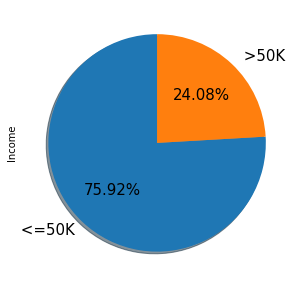

In [7]:
# Let's check the percentage covered by each class

census_data["Income"].value_counts().plot.pie(figsize=(8,5), autopct="%.2f%%", shadow=True, fontsize=15, startangle=90)

We will deal with class imbalance after some analysis. Now, Let's analysis the inputs vs target

<AxesSubplot:ylabel='Sex'>

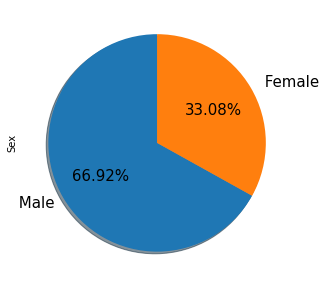

In [8]:
# Let's check how many Male and Female are in the dataset

census_data["Sex"].value_counts().plot.pie(figsize=(8,5), autopct="%.2f%%", shadow=True, fontsize=15, startangle=90)

66.92 % Data is covered by Male and 33.08 % Data is covered by Female. Now Let' check that what is the impact of Sex on Income

<AxesSubplot:xlabel='Sex', ylabel='count'>

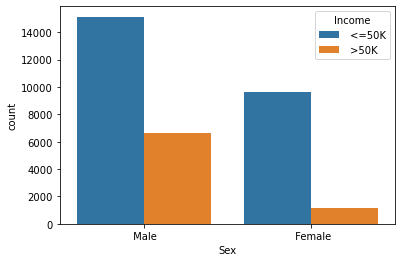

In [9]:
# Impact of Sex on Income

sns.countplot(x="Sex", data=census_data, hue="Income")

Approx more than 50 % Male are getting Income <=50k and approx more than 80 % Female are getting Income <50K.

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

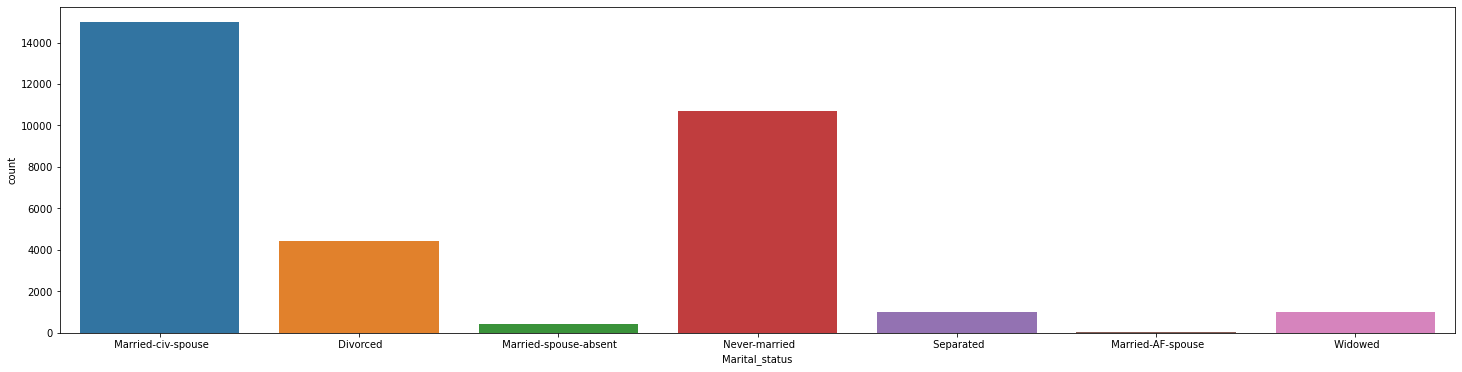

In [10]:
# let's check the Marital Stats

plt.figure(figsize=(25,6))
sns.countplot(x="Marital_status", data=census_data)

census_data["Marital_status"].value_counts()

Married-civ-spouse, Never-married and Divorced are love to do jobs

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

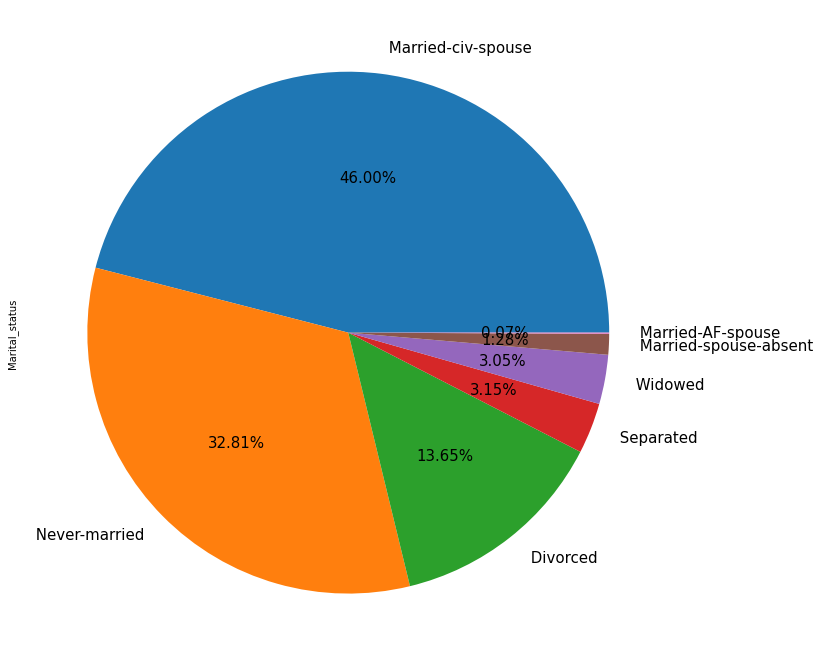

In [11]:
# let's check the percentage of Marital Stats

census_data["Marital_status"].value_counts().plot.pie(figsize=(15,12), autopct="%.2f%%", fontsize=15)

census_data["Marital_status"].value_counts()

Married-civ-Spouse covered  46 % of data followed by Never-married people 32.81 %. And Married Armed Force is playing very less role in this dataset which is 0.07 %. Now, Let's check their Income level

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

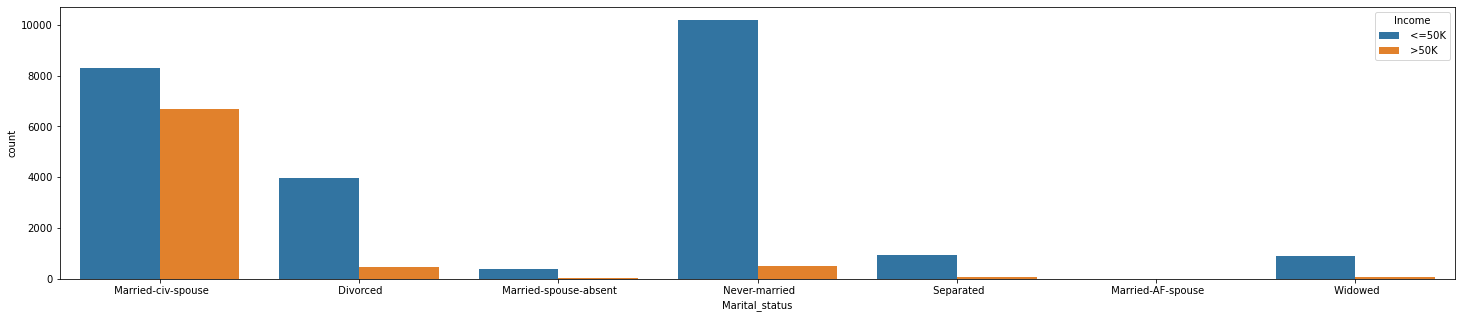

In [12]:
# Let's see the impact of Marital_Status on Income

plt.figure(figsize=(25,5))
sns.countplot(x="Marital_status", data=census_data, hue="Income")


Most Never Married people are getting Income <=50k followed by Divorced people. Married people play approx equal level.

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

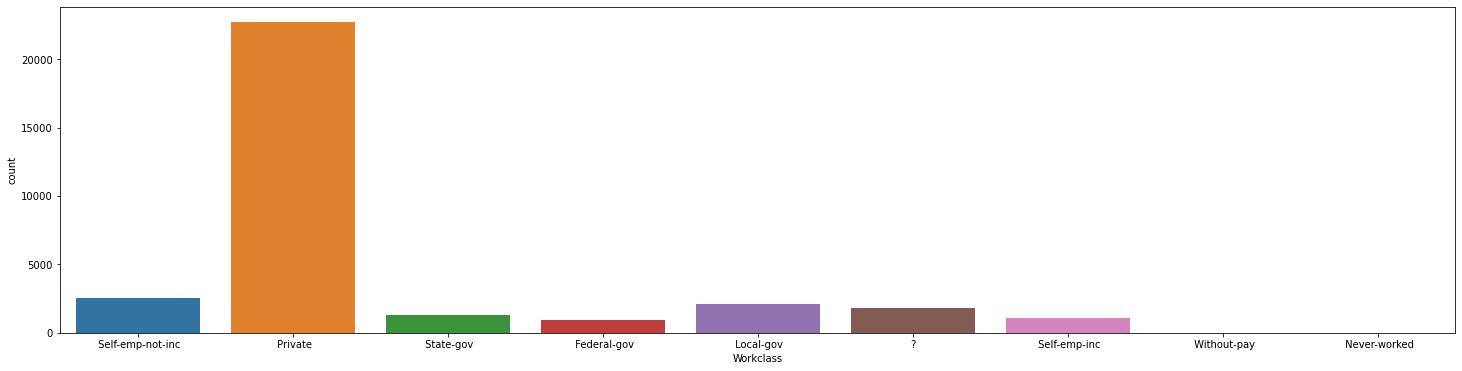

In [13]:
# let's chekc the Workclass

plt.figure(figsize=(25,6))
sns.countplot(x="Workclass", data=census_data)

census_data["Workclass"].value_counts()

Most people are doing Private Jobs

<AxesSubplot:xlabel='Workclass', ylabel='count'>

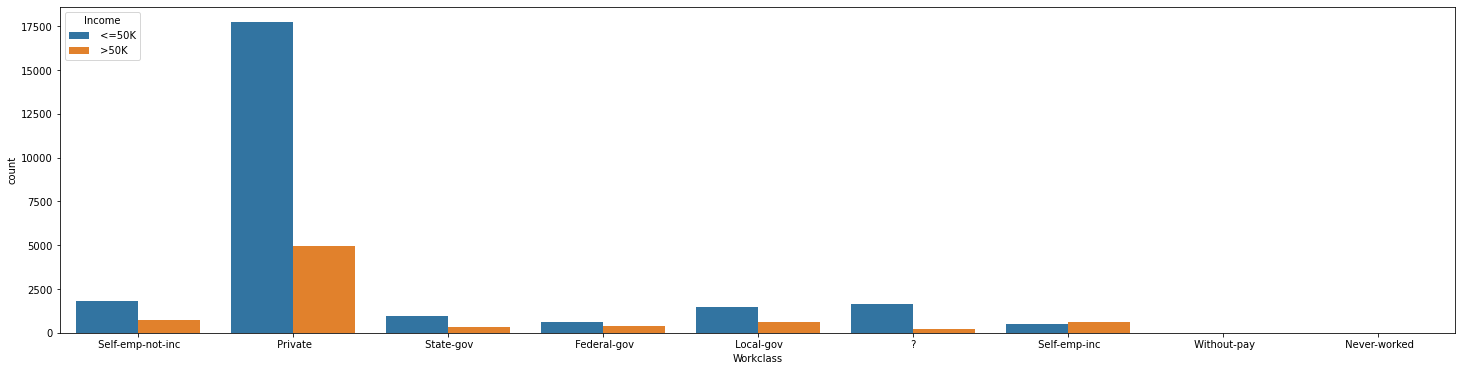

In [14]:
# Workclass vs Income

plt.figure(figsize=(25,6))
sns.countplot(x="Workclass", data=census_data, hue="Income")

There is no issue that private employee have income <=50K but Self-emp-inc play equal role according to their counts in the dataset

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

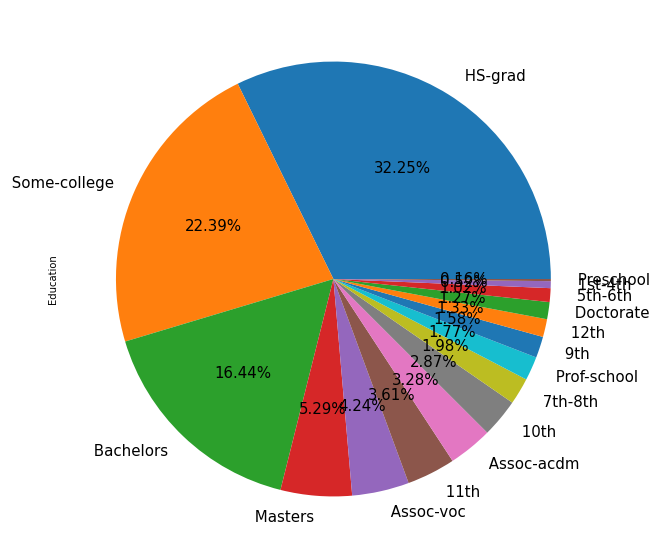

In [15]:
# Education Level

census_data["Education"].value_counts().plot.pie(figsize=(15,10), autopct="%.2f%%", fontsize=15)

census_data["Education"].value_counts()

Most data covered by  HS-gard, Some-college employee and Bachelors. And in this data who are from schools doing jobs

In [16]:
# Let's check the country of employee

census_data["Native_country"].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Most of the employee are from United State and only one employee is from Holand-Netherlands

<AxesSubplot:xlabel='Sex', ylabel='Hours_per_week'>

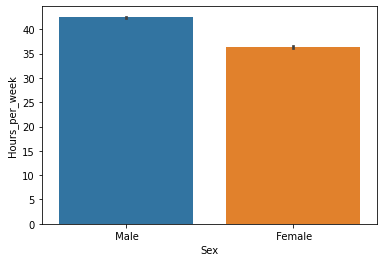

In [17]:
# Let's check the Sex vs Hour per week

sns.barplot(x="Sex", y="Hours_per_week", data=census_data)

Male are getting High rate than female

<AxesSubplot:xlabel='Education', ylabel='Hours_per_week'>

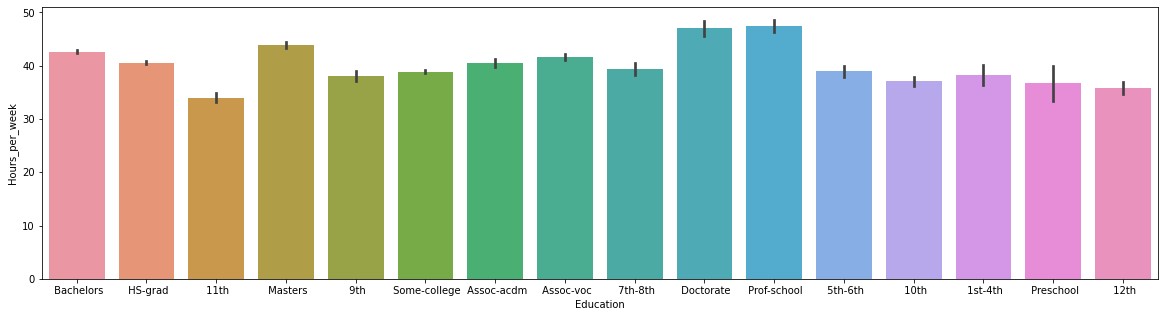

In [18]:
# Let's check the Education vs Hours per week

plt.figure(figsize=(20,5))
sns.barplot(x="Education", y="Hours_per_week", data=census_data)

The employee who are Doctorate and Prof-school are getting high rate than others and 11th are getting less rate than others.

<AxesSubplot:xlabel='Workclass', ylabel='Hours_per_week'>

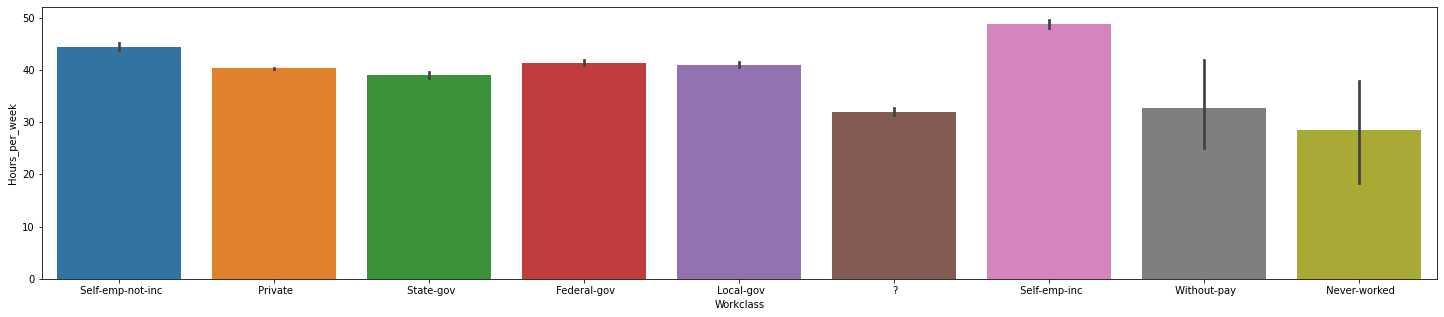

In [19]:
# workclass vs Hours per week

plt.figure(figsize=(25,5))
sns.barplot(x="Workclass", y="Hours_per_week", data=census_data)

Self employeed are getting High Weekly Rate than others

<AxesSubplot:xlabel='Marital_status', ylabel='Hours_per_week'>

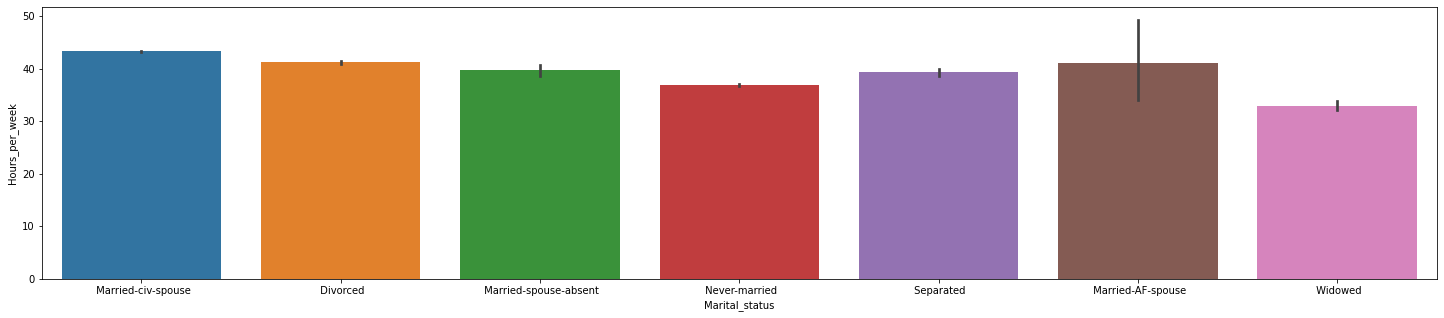

In [20]:
# Marital Status vs Hours per week

plt.figure(figsize=(25,5))
sns.barplot(x="Marital_status", y="Hours_per_week", data=census_data)

Here is Married civilian spouse have high weekly rate than others

<AxesSubplot:xlabel='Age', ylabel='Fnlwgt'>

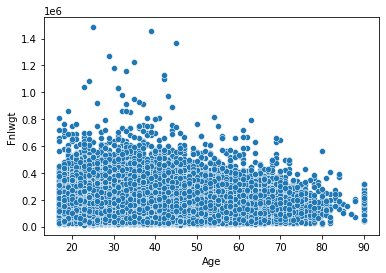

In [21]:
# Age wise Final Weight

sns.scatterplot(x="Age", y="Fnlwgt", data=census_data)

<AxesSubplot:xlabel='Age', ylabel='Fnlwgt'>

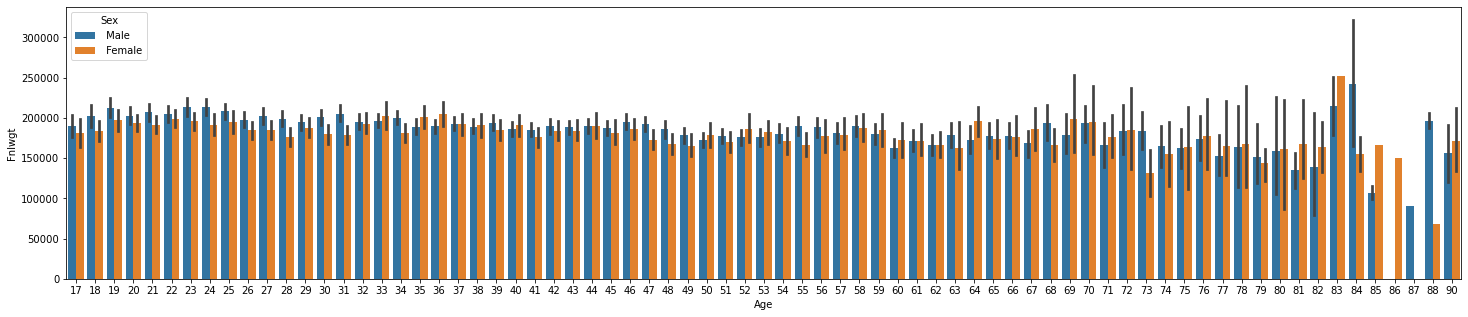

In [22]:
# Sex and Age vs Final Weight

plt.figure(figsize=(25,5))
sns.barplot(x="Age", y="Fnlwgt", data=census_data, hue="Sex")

Almost equal to all ages and Sex

In [23]:
# Let's check that correlation matrix

corr = census_data.corr()
corr

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


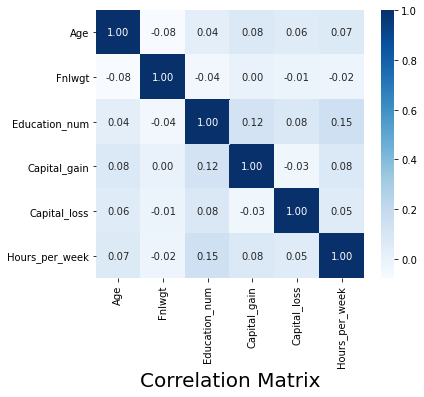

In [24]:
# Let's plot a heatmap for clear visualization

plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar=True, annot=True, cbar_kws={"shrink" : .82}, annot_kws={"size" : 10}, fmt=".2f", cmap="Blues",
            square=True)
plt.xlabel("Correlation Matrix", fontsize=20)
plt.show()

It seems that not a single column is highly related to each other means multicollinearity is not exist

In [25]:
# Let's check the skewness of the dataset

print(census_data.skew())
print("\nTotal count of numerical features : ",len(census_data.skew()))
print("\nCount of features which are significant skewed : ",len(census_data.skew().loc[abs(census_data.skew())>0.5]))

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

Total count of numerical features :  6

Count of features which are significant skewed :  4


In [26]:
# Let's remove the skewness

for index in census_data.skew().index:
    if census_data.skew().loc[index]>0.5:
        census_data[index] = np.log1p(census_data[index])
    if census_data.skew().loc[index]<-0.5:
        census_data[index] = np.square(census_data[index])

In [27]:
# Let's check the skewness again

print(census_data.skew())
print("\nTotal count of numerical features : ",len(census_data.skew()))
print("\nCount of features which are significant skewed : ",len(census_data.skew().loc[abs(census_data.skew())>0.5]))

Age              -0.113322
Fnlwgt           -0.671301
Education_num    -0.311630
Capital_gain      3.096803
Capital_loss      4.307460
Hours_per_week    0.227636
dtype: float64

Total count of numerical features :  6

Count of features which are significant skewed :  3


In [28]:
# 3 columns is still have skewness. So, Let's check if there any column have 0 value or not

for column in census_data:
    print(column+" = "+str(census_data[census_data[column]==0].shape[0]))
    
print("\nShape of the dataset : ",census_data.shape)

Age = 0
Workclass = 0
Fnlwgt = 0
Education = 0
Education_num = 0
Marital_status = 0
Occupation = 0
Relationship = 0
Race = 0
Sex = 0
Capital_gain = 29849
Capital_loss = 31041
Hours_per_week = 0
Native_country = 0
Income = 0

Shape of the dataset :  (32560, 15)


Out of 30540 Rows, Capital_gain does not have 91.92 % data and Capital_loss does not have 99.84 % data.

It means, these column is not useful for model building. Let's crop it...

In [29]:
# Droping unuseful columns

census_data.drop(columns = ["Capital_gain", "Capital_loss"], axis=1, inplace=True)

In [30]:
# Let's convert the target variable object to classification

census_data["Income"] = census_data["Income"].replace({" <=50K" : 1, " >50K" : 0})
census_data["Income"].value_counts()

1    24719
0     7841
Name: Income, dtype: int64

In [31]:
# Let's convert the categorical columns to numerica columns which is present in the dataset

census_data = pd.get_dummies(census_data, drop_first=True)
census_data.head()

,Age,Fnlwgt,Education_num,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,3.931826,128.376783,13,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3.663562,150.832739,9,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3.988984,152.921842,7,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3.367296,162.104167,13,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.637586,157.722961,14,40,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


1    24719
0    24719
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

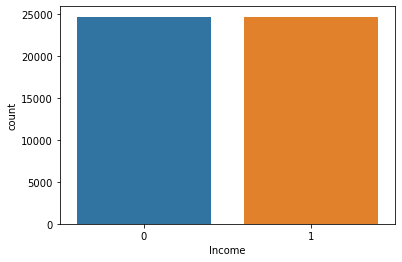

In [32]:
# Let's balance the classes

from imblearn.over_sampling import SMOTE

x = census_data.drop(columns = ["Income"])
y = census_data["Income"]

smt = SMOTE()
x,y = smt.fit_resample(x,y)

# Let's check the class imbalance issue solved or not

print(y.value_counts())

sns.countplot(y)

Class Imbalance issue has been solved. Let's try pca

Shape of the dataset :  (32560, 99)
Number of component explaining 98 % variance :  88


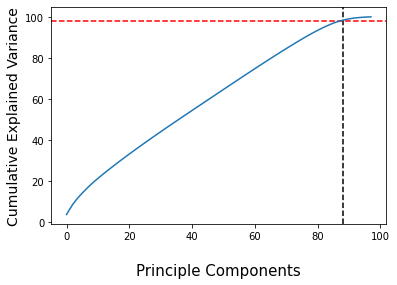

In [33]:
# Let's use the PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_pca = PCA()
x_pca.fit(x_scaled)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>98)
print("Shape of the dataset : ",census_data.shape)
print("Number of component explaining 98 % variance : ", k)

plt.xlabel("\nPrinciple Components", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=98, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

In [34]:
# Let's use the pca scaling for model building

pca = PCA(n_components = 88)
df_x = pca.fit_transform(x_scaled)
df_x

array([[-2.34107213,  0.35290179, -0.20176197, ..., -0.42195494,
        -0.06506047,  0.89834871],
       [ 1.33354245, -1.16406493, -0.88008601, ..., -0.2413814 ,
         0.32826798, -0.23574274],
       [ 1.68157438, -1.50560376,  1.27109529, ..., -0.38582744,
        -0.05079183, -0.45548796],
       ...,
       [-2.67621508,  0.42259707,  1.32656262, ..., -0.84097831,
        -0.34800823, -0.80771266],
       [-2.15719578,  0.30862851, -0.17391736, ...,  0.12713016,
         1.02901888, -0.33069626],
       [-2.64942717,  1.59038251, -0.13506953, ...,  0.03692834,
         0.70724382,  0.71052859]])

In [35]:
# Let's import the necessary libraries for model building

from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from time import time

In [36]:
# Let's find the best random state

def bestmodel(model):
    max_auc = 0
    max_state = 0
    start = time()
    for i in range(21,201):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.20, random_state = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = accuracy_score(y_test, y_pred)
        if score > max_auc:
            max_auc = score
            max_state = i
    print("Best Random State is      : ",max_state)
    print("Best Accuracy Score is    : ",max_auc)
    print("Cross Validation Score is : ",cross_val_score(model,df_x,y,cv=5).mean())
    end = time()
    print("\nTime taken by model for prediction is : {:.4f} seconds".format(end-start))

In [37]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
bestmodel(LR)

Best Random State is      :  171
Best Accuracy Score is    :  0.8539644012944984
Cross Validation Score is :  0.8403466861620453

Time taken by model for prediction is : 233.1419 seconds


In [38]:
# Let's make the format for all the model

def bestmod(mod):
    start = time()
    x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.20, random_state = 171)
    mod.fit(x_train, y_train)
    y_pred = mod.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    print("Best Accuracy Score is    : ",score)
    print("Cross Validation Score is : ",cross_val_score(mod,df_x,y,cv=5).mean())
    end = time()
    print("\nTime taken by model for prediction is : {:.4f} seconds".format(end-start))

In [39]:
# Decision Tree Classification

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
bestmod(DTC)

Best Accuracy Score is    :  0.8333333333333334
Cross Validation Score is :  0.8210707839197822

Time taken by model for prediction is : 61.2708 seconds


In [40]:
# K-Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()
bestmod(KNC)

Best Accuracy Score is    :  0.8694377022653722
Cross Validation Score is :  0.852038886914038

Time taken by model for prediction is : 99.9891 seconds


In [41]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
bestmod(GBC)

Best Accuracy Score is    :  0.8658980582524272
Cross Validation Score is :  0.8518766900113679

Time taken by model for prediction is : 917.7643 seconds


In [42]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
bestmod(RFC)

Best Accuracy Score is    :  0.8812702265372169
Cross Validation Score is :  0.8621327043324192

Time taken by model for prediction is : 317.0357 seconds


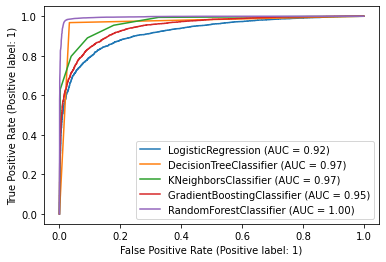

In [43]:
# Let's plot ROC AUC curve

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.20, random_state = 171)

disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(KNC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={"size" : 10}, loc="lower right")
plt.show()

#### After analyzing the accuracy score, cross_val_score and roc auc curve, It is clear that Random Forest Classifier is giving the best score. So, let's try to increase the score using hyperparameter tuning.

In [47]:
# HyperParameter Tuning with Random Forest Classifier

from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators" : [100,200],"criterion" : ["gini", "entropy"],
              "min_samples_leaf" : [1,2], "min_samples_split" : [2,3]}

grid_search = GridSearchCV(RFC, param_grid)
grid_search.fit(x_train, y_train)

# Final Model

x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size = 0.20, random_state = 171)
Final_Census_Model = RandomForestClassifier(n_estimators=100, criterion="entropy", min_samples_leaf=1,min_samples_split=2)
Final_Census_Model.fit(x_train, y_train)
y_preds = Final_Census_Model.predict(x_test)
accuracy_score(y_test, y_preds)

0.8816747572815534

In [48]:
# Saving Final Model

import joblib

joblib.dump(Final_Census_Model,"Final_Census_Income_Model.pkl")

['Final_Census_Income_Model.pkl']